# TABLE OF CONTENTS
<ol>
<li> Loading Required Libraries</li>
<li> Trying to generate a sample image </li>
<li> Generating Dataset </li>
<li> Preprocessing </li>
<li> Creating a function to visualize model training </li>
<li> Creating Artificial Neural Networks (Perceptrons) </li>
<li> Creating Convolutional Neural Networks </li>
<li> Comparisions and Results </li>


# 1.Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Input,Flatten,Dropout,concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
sb.set_style('whitegrid')

# 2.Trying to generate a required image

Coordinates for pixel with value 255:(13, 31)


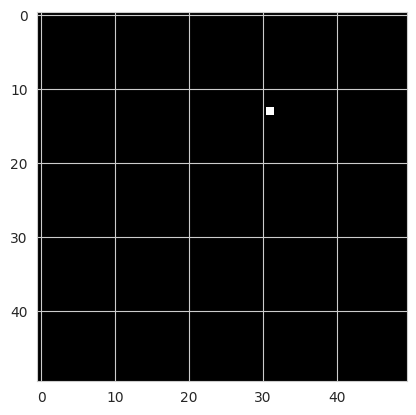

In [2]:
# Creating a 50x50 image with all pixels at value 0
image = np.zeros((50, 50), dtype=np.uint8)

# Select a random position for a pixel with value 255

x,y = np.random.randint(0, 50, size=2) # Creates a array of size 2 (x and y cordinates)

image[x, y] = 255
print(f"Coordinates for pixel with value 255:{x,y}")

# Plot the image
plt.imshow(image,cmap = 'gray')
plt.show()

#3.Generating a dataset

In [3]:
def generate_image(num_samples):
    images = []
    labels = []

    for _ in range(num_samples):
        # Create a 50x50 image with all pixels set to 0
        image = np.zeros((50, 50), dtype=np.uint8)

        # Randomly select coordinates for the pixel with value 255
        x, y = np.random.randint(0, 50, size=2)

        # Set the pixel at (x, y) to 255
        image[x, y] = 255

        # Append the image and the label (coordinates of the 255 pixel)
        images.append(image)
        labels.append([x, y])

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels


<h2> Rationale of creating the dataset </h2>
<h3> 1. Input image structure </h3>
<p> Grayscale simplifies the image representation and reduces complexity. There is only one channel to process, which reduces computational cost.</p>
<h3> 2.Pixel Values </h3>
<p> A sparse representation with only one highlighted pixel makes the task well-defined and minimizes confusion for the model, as it only needs to focus on the one white pixel.</p>
<h3>3.Label Structure </h3>
<p> Predicting the coordinates directly makes the problem easier to formulate as a regression task, where the model can minimize error between the predicted coordinates and the true pixel coordinates.</p>

In [4]:
# Generate  train set with 10000 samples
x_train, y_train = generate_image(10000)

# Generate test set with 1000 samples
x_test, y_test = generate_image(1000)

# Generate validation set with 100 samples
x_valid, y_valid = generate_image(100)

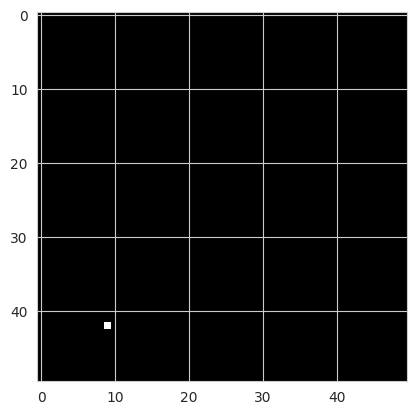

In [5]:
plt.imshow(x_train[0],cmap = 'gray');

# 4.Preprocessing

In [6]:
# Normalizing images
x_train = x_train/255.0
x_test = x_test/255.0
x_valid = x_valid/255.0

In [7]:
x_train = x_train.reshape(-1, 50, 50, 1)
x_test = x_test.reshape(-1, 50, 50, 1)
x_valid = x_valid.reshape(-1, 50, 50, 1)


# 5.Creating a function to visualize model training

In [8]:
def plot_function(history):
    fig,ax = plt.subplots(1,2,figsize = (25,7))
    ax[0].plot(history.history['loss'],color = 'red',label = 'train_loss')
    ax[0].set_title('Train Loss and Validation loss')
    ax[0].plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    ax[0].legend()
    ax[0].set_xlabel('EPOCHS')
    ax[0].set_ylabel('LOSS')
    ax[1].plot(history.history['mae'],color = 'orange',label = 'mae')
    ax[1].set_title('Train MAE and Validation MAE')
    ax[1].plot(history.history['val_mae'],color = 'black',label = 'val_mae')
    ax[1].legend()

# 6.Creating Artificial Neural Network (Perceptron)

<h3> Function to make Artificial Neural Network.</h3>
<p> The function is modifiable by user defined input_shape , number of layers and activation functions of hidden layers </p>

In [9]:
def ANN_MODEL(input_shape,num_layers,layer_activation):

  # Input layer
  inputs = Input(shape = input_shape)
  x = Dense(128,activation = layer_activation)(inputs)
  neurons = 128
  x = Flatten()(x)

  #Hidden Layers
  for i in range (num_layers):
    neurons *=2
    x = Dense(neurons*2)(x)

  #Output Layer
  outputs = Dense(2,activation = 'linear')(x)

  #Creating model
  model = Model(inputs,outputs)
  return model

In [10]:
input_shape = (50, 50, 1)
num_layers = 5
layer_activation = "relu"

# model 1 with activation function relu
model1 = ANN_MODEL(input_shape=input_shape,num_layers=num_layers,layer_activation=layer_activation)
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50, 50, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50, 50, 128)         │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │     163,840,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8192)                │      33,562,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │          16,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,436,994 (795.12 MB)

 Trainable params: 208,436,994 (795.12 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# compiling model 1
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fitting and training model 1
history1 = model1.fit(x_train,y_train,batch_size = 128,epochs = 50,validation_data = (x_test,y_test))

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - loss: 419.0060 - mae: 15.7036 - val_loss: 25.1882 - val_mae: 3.5728
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 11.4717 - mae: 2.3717 - val_loss: 9.9621 - val_mae: 1.9053
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 3.4309 - mae: 1.2306 - val_loss: 8.9757 - val_mae: 1.7775
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 2.8356 - mae: 1.0917 - val_loss: 7.7646 - val_mae: 1.4615
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 2.9055 - mae: 1.1298 - val_loss: 8.7860 - val_mae: 1.6266
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 3.7766 - mae: 1.2892 - val_loss: 9.8653 - val_mae: 2.0135
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 5.4130 - mae: 1.6852 - val_loss: 8.2728 - val_mae: 1.6613
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 3.6440 - mae: 1.3339 - val_loss: 10.1650 - val_mae: 2.0115
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - lo

In [12]:
loss1,mae1 = model1.evaluate(x_valid,y_valid)
print(f"Validation set loss:{loss1}, validation set mae:{mae1}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - loss: 5.7032 - mae: 0.7971
Validation set loss:3.8840227127075195, validation set mae:0.723257839679718


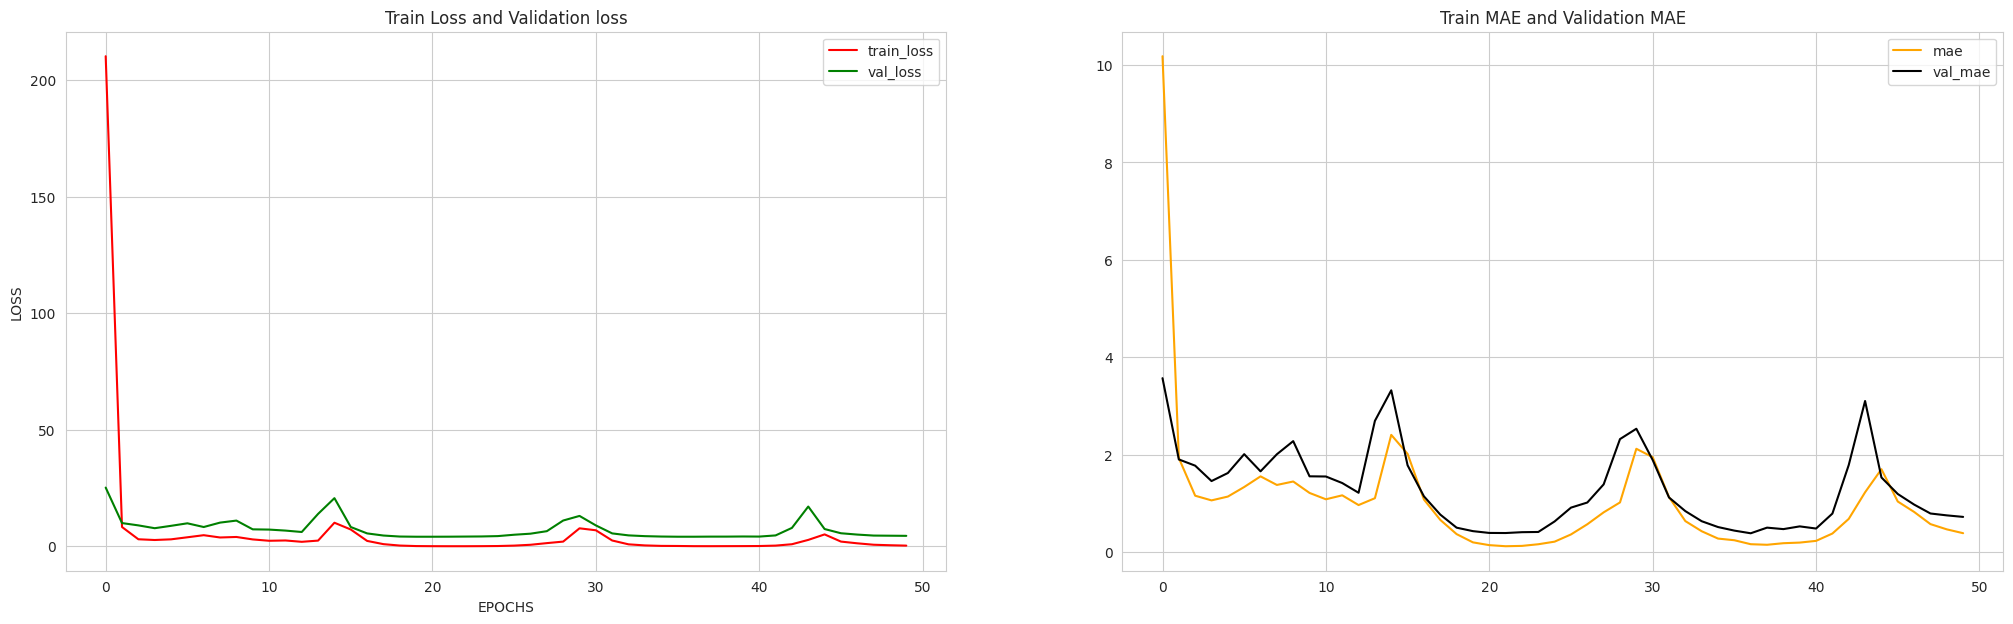

In [13]:
plot_function(history1)

In [14]:
# Creating a model with layer activation as LINEAR
input_shape = (50, 50, 1)
num_layers = 5
layer_activation = "linear"

# model 1 with activation function relu
model2 = ANN_MODEL(input_shape=input_shape,num_layers=num_layers,layer_activation=layer_activation)
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 50, 50, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50, 50, 128)         │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 320000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │     163,840,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8192)                │      33,562,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │          16,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,436,994 (795.12 MB)

 Trainable params: 208,436,994 (795.12 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fitting and training model 2
history2 = model2.fit(x_train,y_train,batch_size = 128,epochs = 50,validation_data = (x_test,y_test))

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 143ms/step - loss: 3047.3828 - mae: 36.4752 - val_loss: 122.0615 - val_mae: 9.1237
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - loss: 83.6764 - mae: 7.1736 - val_loss: 10.9641 - val_mae: 1.8955
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 3.9563 - mae: 1.2354 - val_loss: 4.9371 - val_mae: 0.8039
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.8774 - mae: 0.4959 - val_loss: 4.1943 - val_mae: 0.4908
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.1496 - mae: 0.2158 - val_loss: 4.1233 - val_mae: 0.3763
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0722 - mae: 0.1413 - val_loss: 4.0543 - val_mae: 0.3804
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0558 - mae: 0.1374 - val_loss: 4.0807 - val_mae: 0.3873
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.1710 - mae: 0.2197 - val_loss: 4.5519 - val_mae: 0.6448
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/ste

In [16]:
loss2,mae2 = model2.evaluate(x_valid,y_valid)
print(f"Validation set loss:{loss2}\n validation set mae:{mae2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 7.8618 - mae: 1.5624
Validation set loss:6.0007548332214355
 validation set mae:1.4896190166473389


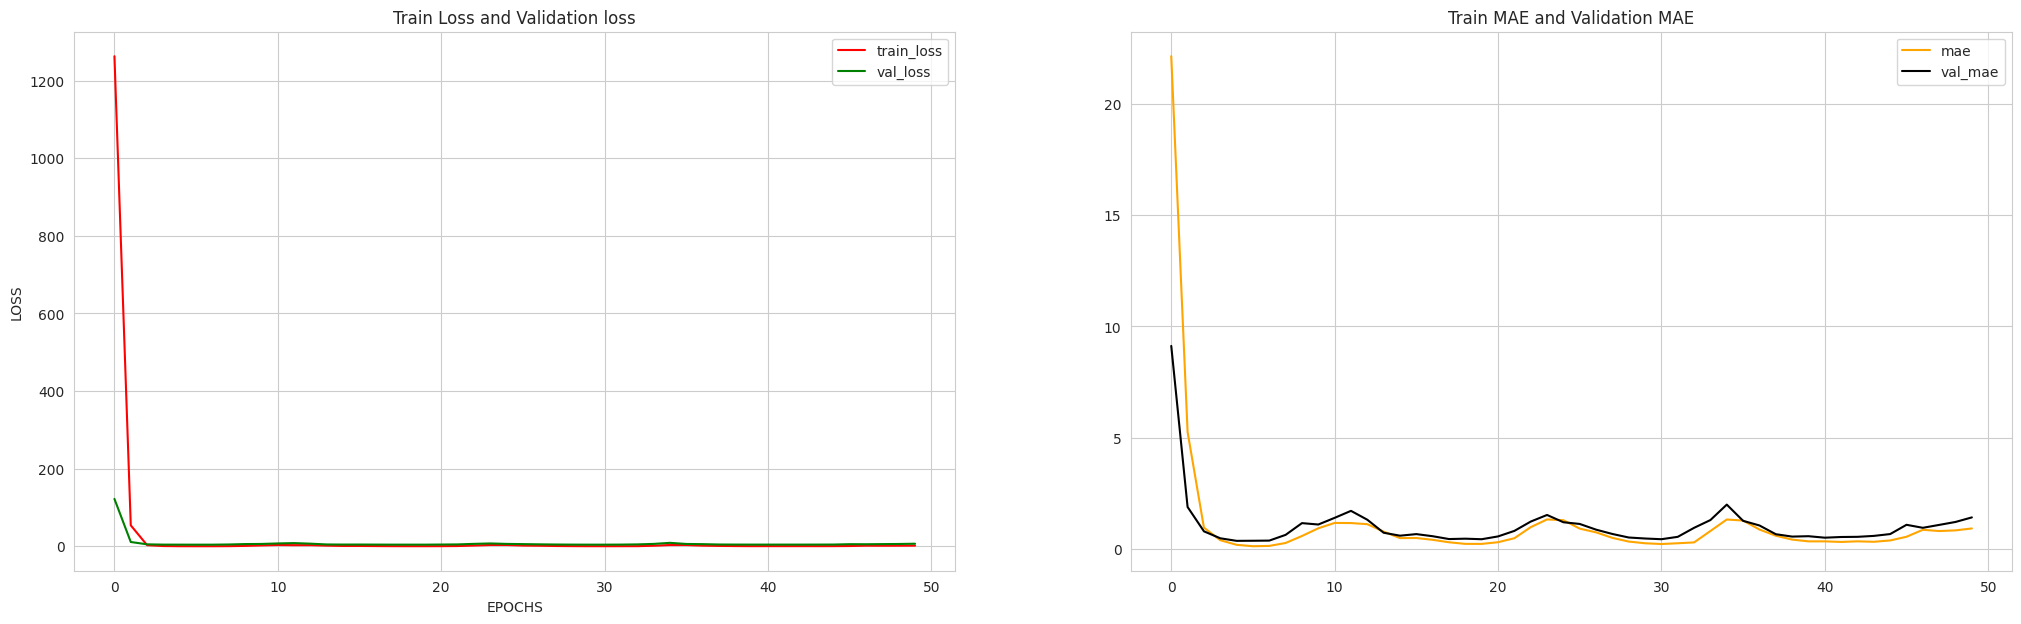

In [17]:
plot_function(history2)

# 7.Creating Convolutional Neural Network

<h3> Creating a Standard Convolutional Neural Network

In [18]:
def cnn_model(input_shape):
  inputs = Input(shape = input_shape)
  x = Conv2D(64,1,activation = 'relu')(inputs)
  x = MaxPooling2D()(x)

  x = Conv2D(64,2,activation = 'relu')(x)
  x = MaxPooling2D()(x)


  x = Conv2D(256,2,2,activation = 'relu')(x)
  x = Flatten()(x)

  x = Dense(128,activation = 'relu')(x)
  x = Dense(256,activation = 'relu')(x)
  outputs = Dense(2,activation = 'linear')(x)

  model = Model(inputs,outputs)
  return model

In [19]:
model3 = cnn_model(input_shape=(50,50,1))
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 50, 50, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 50, 50, 64)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295,682 (4.94 MB)

 Trainable params: 1,295,682 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compiling model
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fitting Model
history3 = model3.fit(x_train,y_train,batch_size = 128,epochs = 50,validation_data = (x_test,y_test))

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 434.4240 - mae: 16.9481 - val_loss: 27.2078 - val_mae: 3.8701
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 18.3341 - mae: 3.1655 - val_loss: 8.2343 - val_mae: 1.9460
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.0077 - mae: 1.8285 - val_loss: 4.6713 - val_mae: 1.3915
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7944 - mae: 1.3251 - val_loss: 2.4367 - val_mae: 1.0403
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6783 - mae: 0.8931 - val_loss: 1.1137 - val_mae: 0.7578
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8042 - mae: 0.6694 - val_loss: 0.6163 - val_mae: 0.6031
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5307 - mae: 0.5776 - val_loss: 0.5590 - val_mae: 0.6023
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5133 - mae: 0.5785 - val_loss: 0.4614 - val_mae: 0.5588
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 

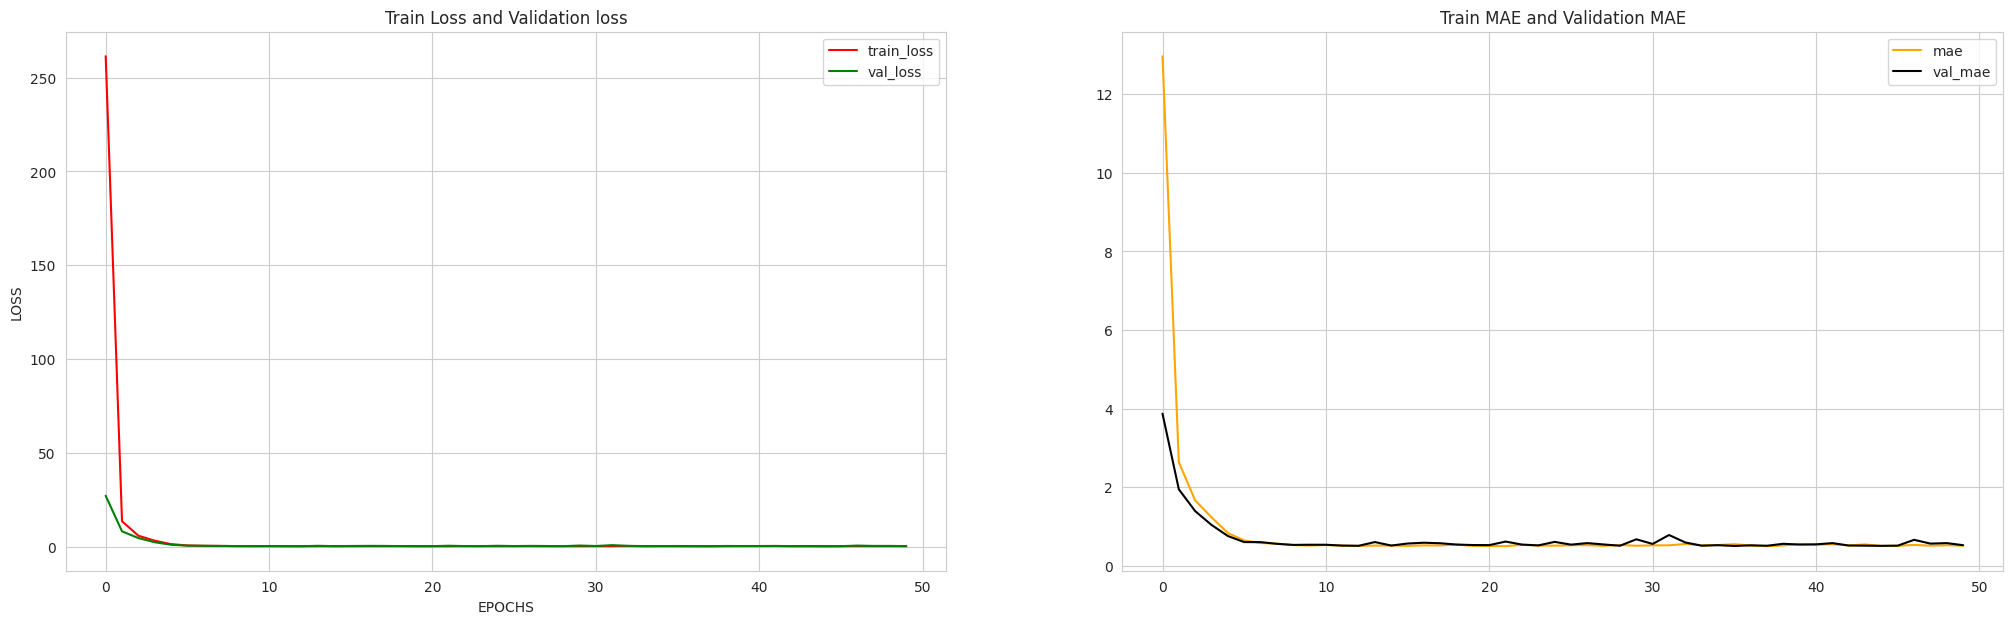

In [21]:
plot_function(history3)

In [22]:
loss3,mae3 = model3.evaluate(x_valid,y_valid)
print(f"Validation set loss:{loss3}\n validation set mae:{mae3}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.3585 - mae: 0.5291
Validation set loss:0.3732776939868927
 validation set mae:0.5400174856185913


<h3> Creating a Y-Type Convolutional Neural Network

In [23]:
def Y_net_model(input_shape):
    left_inputs = Input(shape = input_shape)
    x = left_inputs
    x = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.27)(x)

    x = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.27)(x)

    x = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters = 128,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.27)(x)

    x = Conv2D(filters = 256,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)


    right_inputs = Input(shape = input_shape)
    y = right_inputs
    y = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Dropout(0.27)(y)

    y = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Dropout(0.27)(y)

    y = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Dropout(0.3)(y)

    y = Conv2D(filters = 128,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Dropout(0.27)(y)
    y = Conv2D(filters = 256,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(y)

    y = concatenate([x,y])
    y = Flatten()(y)
    y = Dropout(0.27)(y)
    y = Dense(20,activation ='relu')(y)
    outputs = Dense(2,activation = 'linear')(y)
    model = Model([left_inputs,right_inputs],outputs)
    return model

In [24]:
model4 = Y_net_model(input_shape=(50,50,1))
model4.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 50, 50, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 50, 50, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 50, 50, 64)     │            320 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 50, 50, 64)     │            320 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 50, 50, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 50, 50, 64)     │            256 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 25, 25, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 25, 25, 64)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 25, 25, 64)     │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 25, 25, 64)     │              0 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 25, 25, 64)     │         16,448 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 25, 25, 64)     │         16,448 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 25, 25, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 25, 25, 64)     │            256 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 12, 12, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 489,662 (1.87 MB)

 Trainable params: 488,382 (1.86 MB)

 Non-trainable params: 1,280 (5.00 KB)

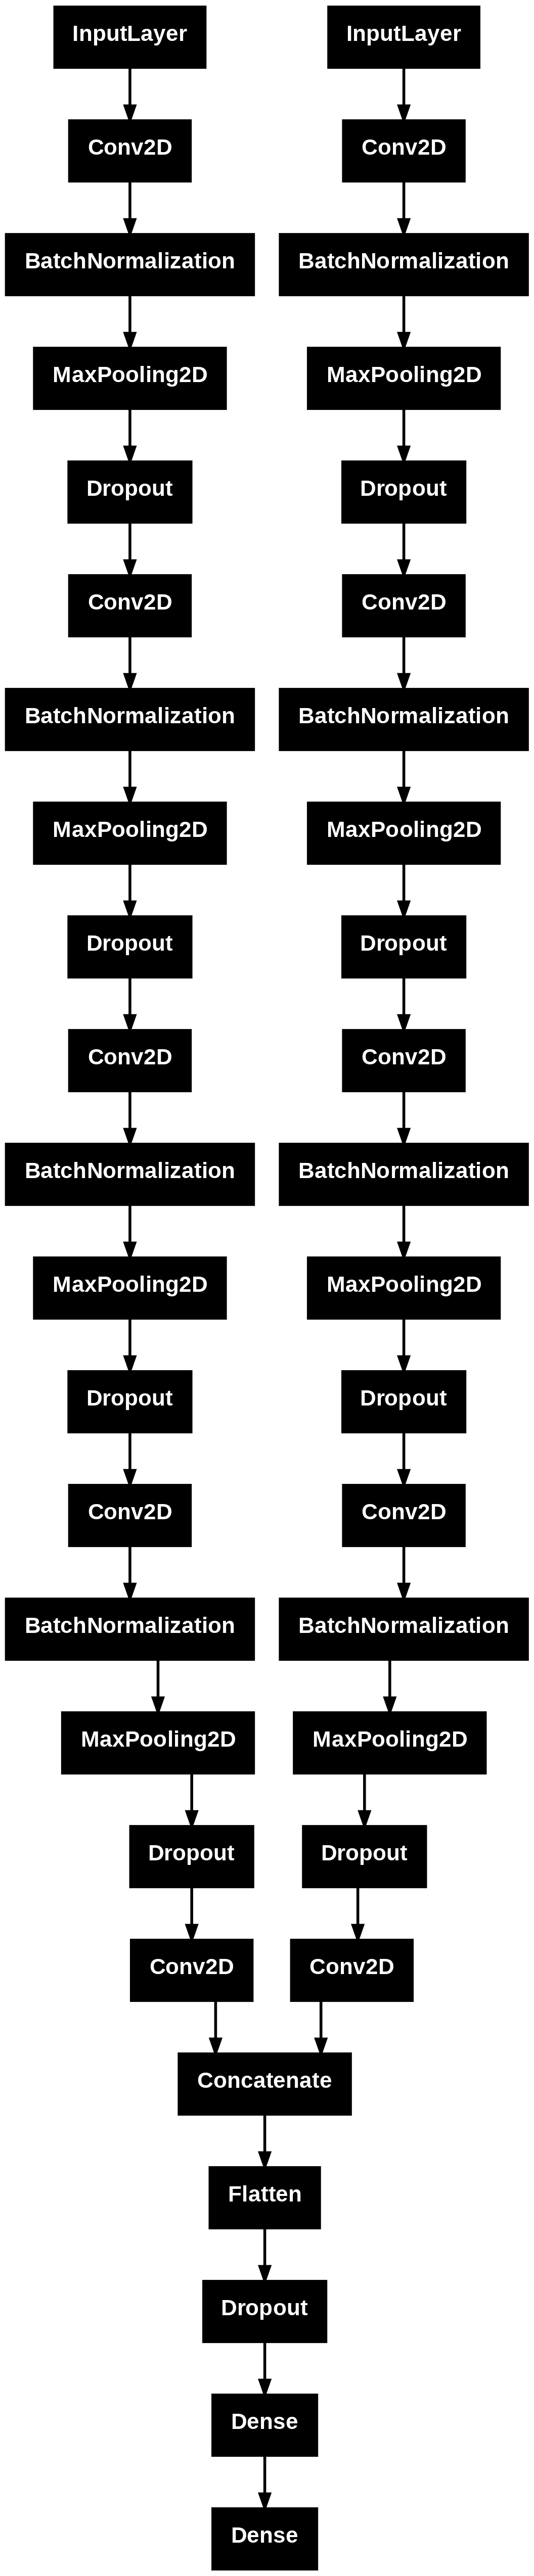

In [25]:
#Visualizing the above model
plot_model(model4)

In [26]:
# Compiling model
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fitting Model
history4 = model4.fit([x_train,x_train],y_train,batch_size = 128,epochs = 50,validation_data = ([x_test,x_test],y_test))

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - loss: 142.5140 - mae: 7.8077 - val_loss: 505.7899 - val_mae: 18.3559
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 8.6503 - mae: 2.2167 - val_loss: 398.9202 - val_mae: 16.2933
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 5.9738 - mae: 1.8410 - val_loss: 384.7912 - val_mae: 16.0836
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 5.3213 - mae: 1.7358 - val_loss: 332.7804 - val_mae: 15.1686
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 4.4145 - mae: 1.5853 - val_loss: 280.3414 - val_mae: 14.2350
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.0975 - mae: 1.5349 - val_loss: 212.1117 - val_mae: 12.8601
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.6518 - mae: 1.4573 - val_loss: 116.8056 - val_mae: 9.5767
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 3.3760 - mae: 1.4041 - val_loss: 59.4877 - val_mae: 6.9795
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 

In [27]:
loss4,mae4 = model4.evaluate([x_valid,x_valid],y_valid)
print(f"Validation set loss:{loss4}\n validation set mae:{mae4}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - loss: 4.3152 - mae: 1.8246
Validation set loss:4.2759013175964355
 validation set mae:1.8176777362823486


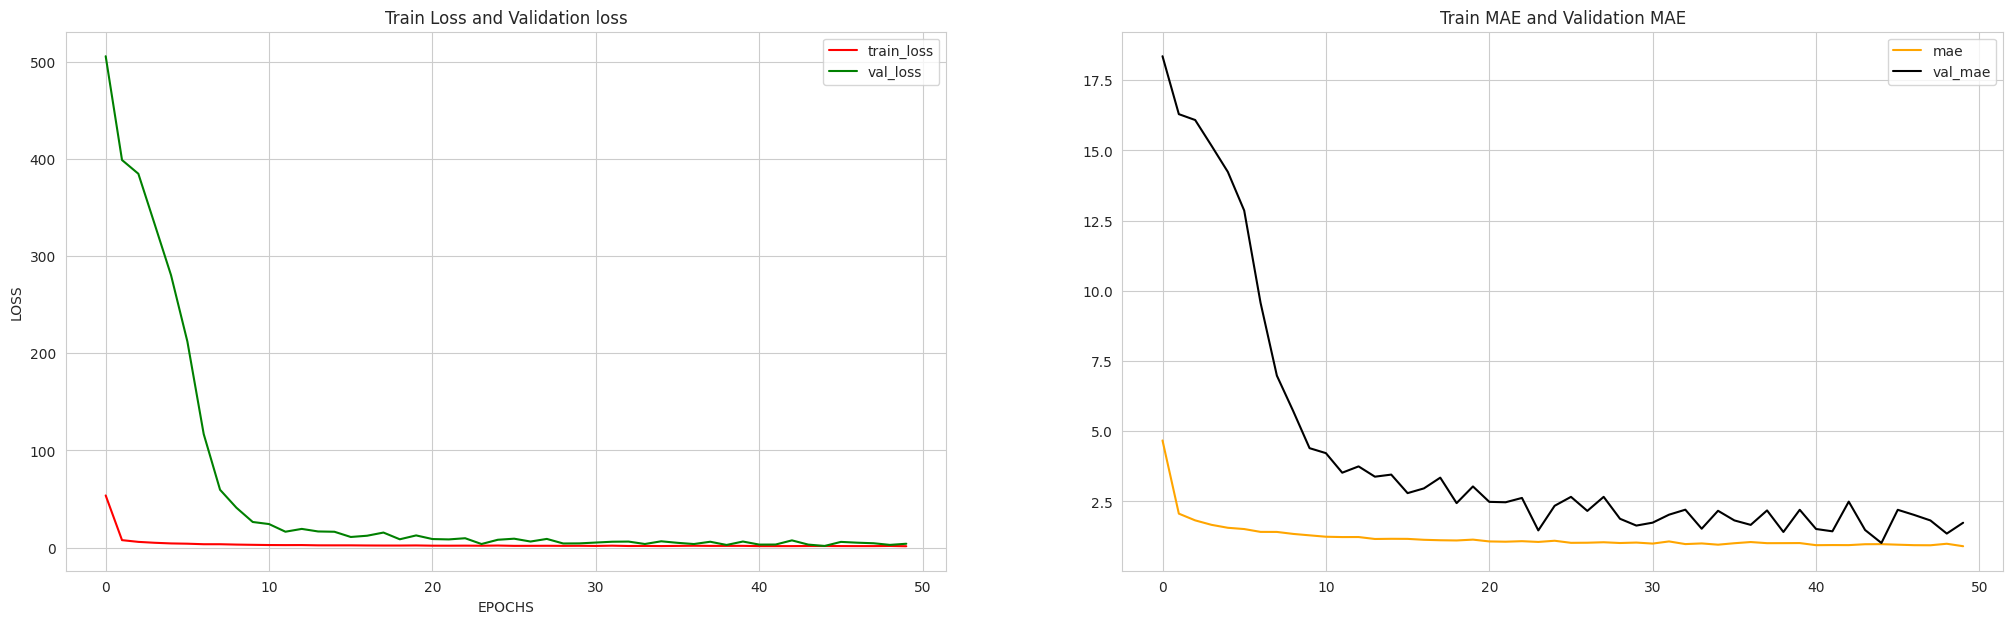

In [28]:
plot_function(history4)

# 8.Comparisions and Results

<h2> A. Graphical Results

In [29]:
def plot_function(history):
    fig,ax = plt.subplots(1,2,figsize = (25,7))
    ax[0].plot(history.history['loss'],color = 'red',label = 'train_loss')
    ax[0].set_title('Train Loss and Validation loss')
    ax[0].plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    ax[0].legend()
    ax[0].set_xlabel('EPOCHS')
    ax[0].set_ylabel('LOSS')
    ax[1].plot(history.history['mae'],color = 'orange',label = 'mae')
    ax[1].set_title('Train MAE and Validation MAE')
    ax[1].plot(history.history['val_mae'],color = 'black',label = 'val_mae')
    ax[1].legend()

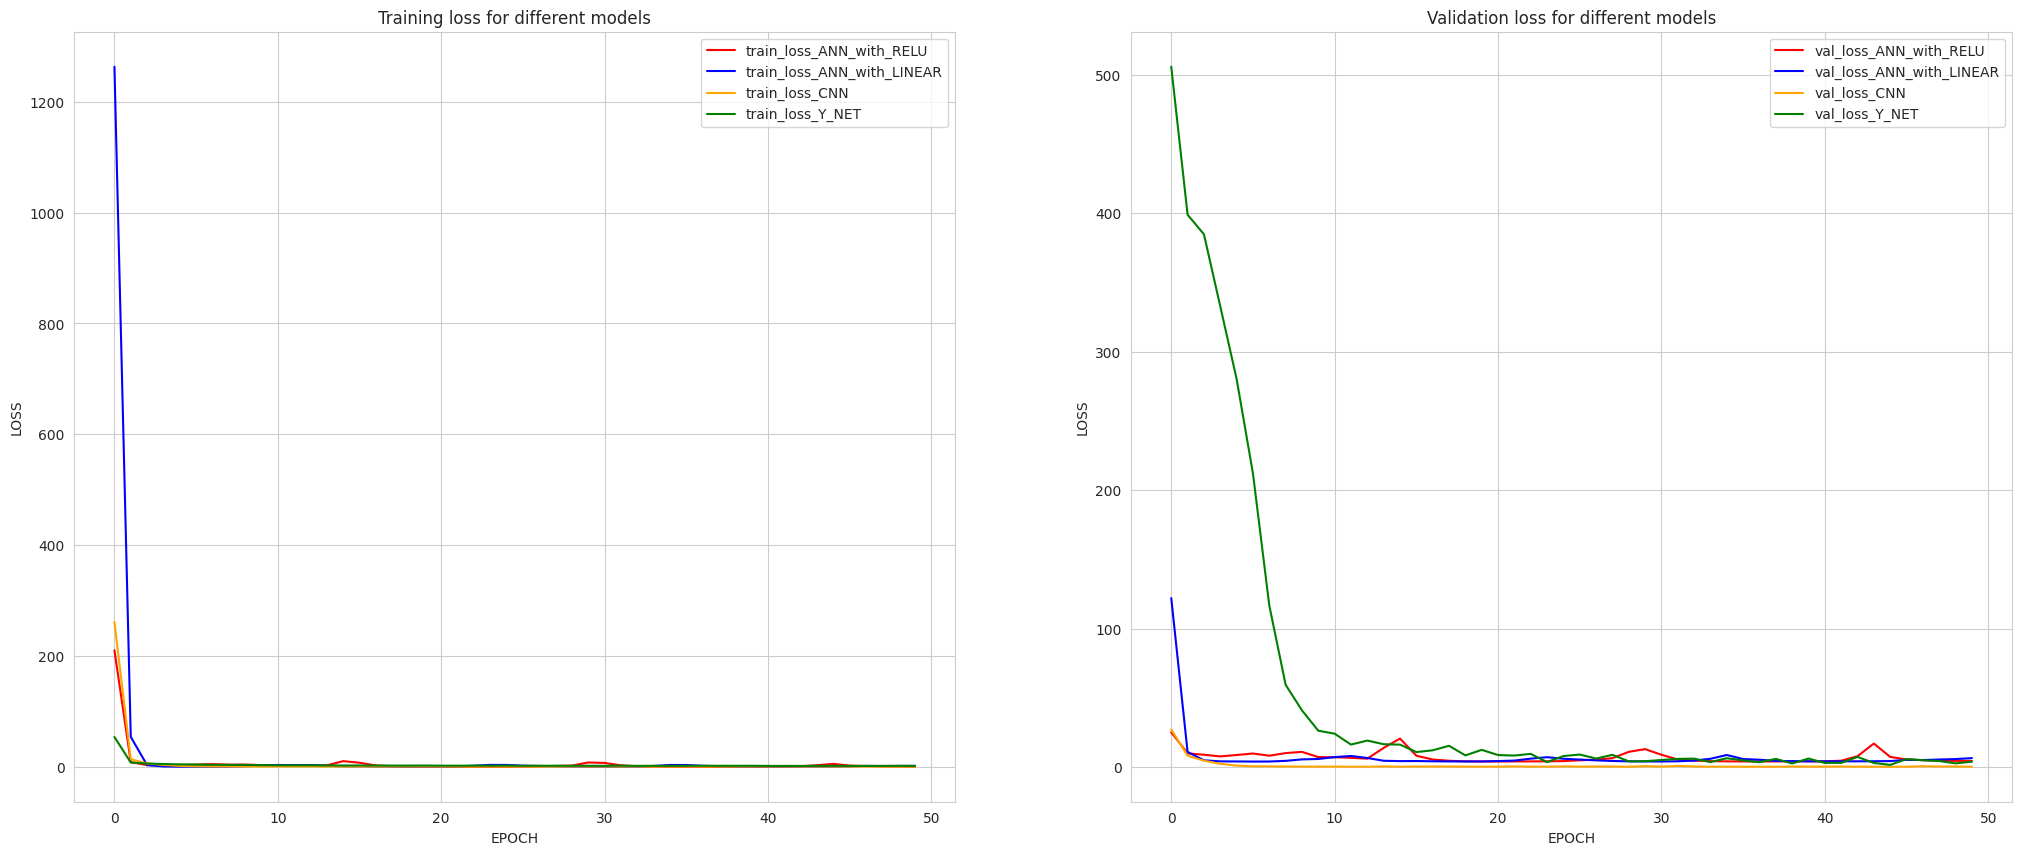

In [30]:
fig,ax = plt.subplots(1,2,figsize = (25,10))
ax[0].plot(history1.history['loss'],color = 'red',label = 'train_loss_ANN_with_RELU')
ax[0].plot(history2.history['loss'],color = 'blue',label = 'train_loss_ANN_with_LINEAR')
ax[0].plot(history3.history['loss'],color = 'orange',label = 'train_loss_CNN')
ax[0].plot(history4.history['loss'],color = 'green',label = 'train_loss_Y_NET')
ax[0].set_title("Training loss for different models")
ax[0].set_xlabel('EPOCH')
ax[0].set_ylabel('LOSS')
ax[0].legend()

ax[1].plot(history1.history['val_loss'],color = 'red',label = 'val_loss_ANN_with_RELU')
ax[1].plot(history2.history['val_loss'],color = 'blue',label = 'val_loss_ANN_with_LINEAR')
ax[1].plot(history3.history['val_loss'],color = 'orange',label = 'val_loss_CNN')
ax[1].plot(history4.history['val_loss'],color = 'green',label = 'val_loss_Y_NET')
ax[1].set_title("Validation loss for different models")
ax[1].set_xlabel('EPOCH')
ax[1].set_ylabel('LOSS')
ax[1].legend()
plt.show()



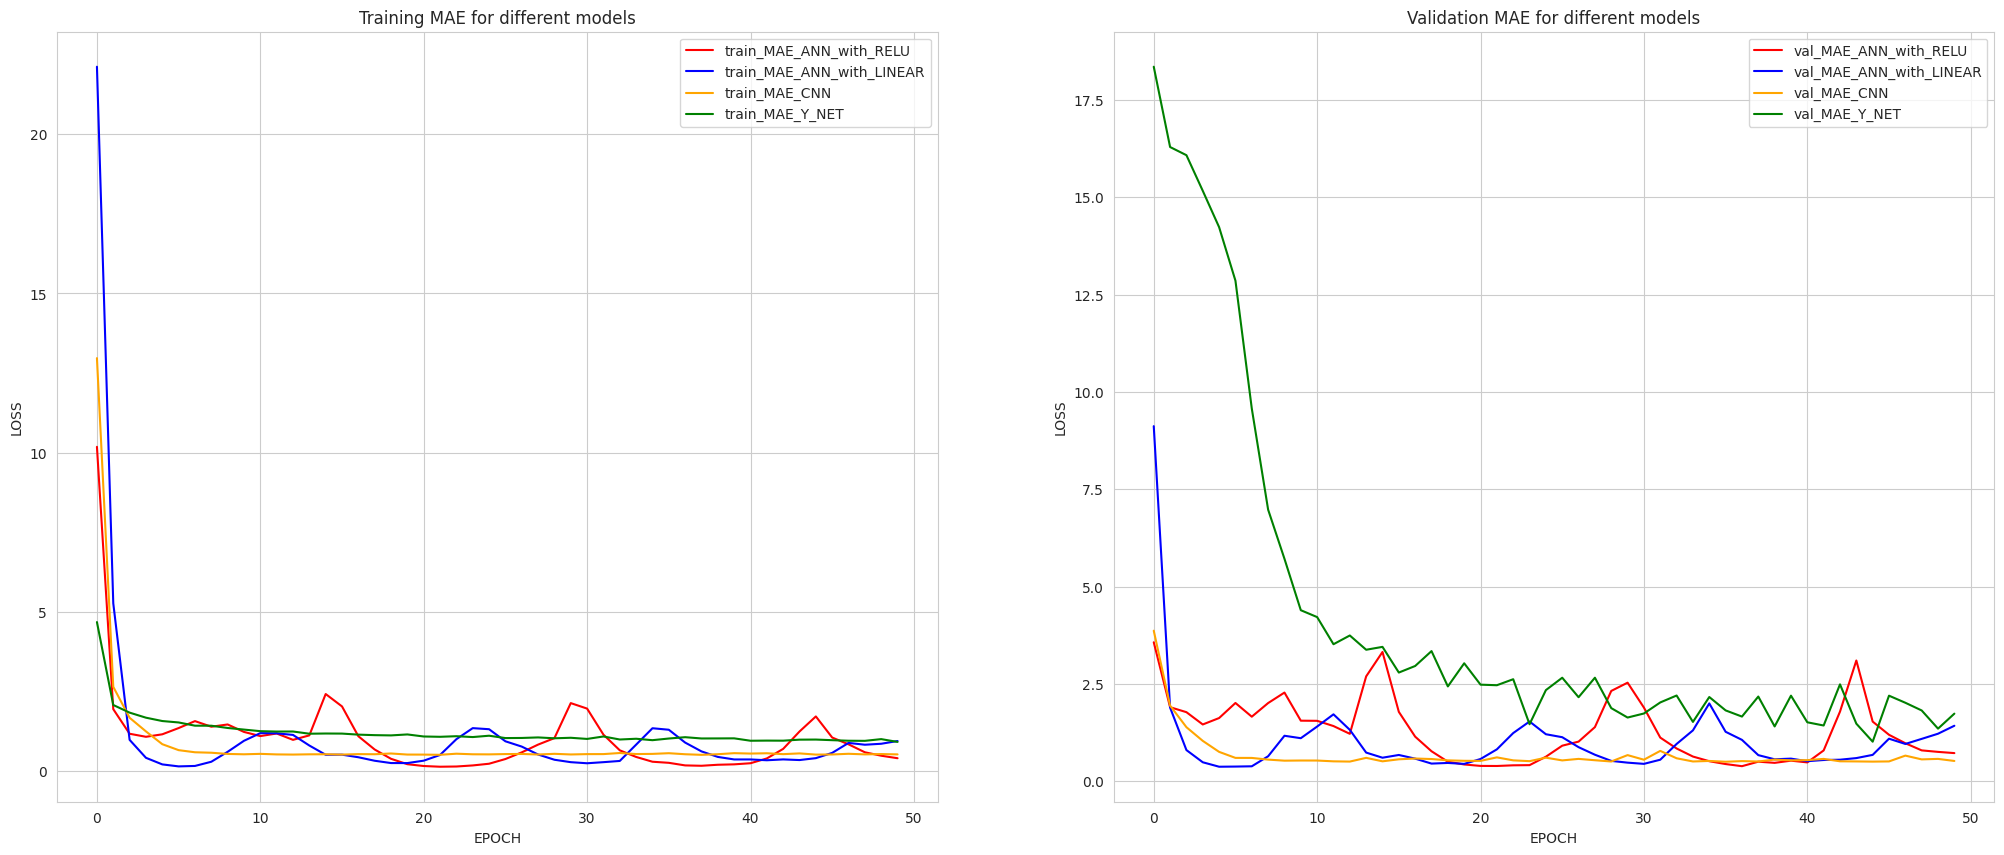

In [31]:
fig,ax = plt.subplots(1,2,figsize = (25,10))
ax[0].plot(history1.history['mae'],color = 'red',label = 'train_MAE_ANN_with_RELU')
ax[0].plot(history2.history['mae'],color = 'blue',label = 'train_MAE_ANN_with_LINEAR')
ax[0].plot(history3.history['mae'],color = 'orange',label = 'train_MAE_CNN')
ax[0].plot(history4.history['mae'],color = 'green',label = 'train_MAE_Y_NET')
ax[0].set_title("Training MAE for different models")
ax[0].set_xlabel('EPOCH')
ax[0].set_ylabel('LOSS')
ax[0].legend()

ax[1].plot(history1.history['val_mae'],color = 'red',label = 'val_MAE_ANN_with_RELU')
ax[1].plot(history2.history['val_mae'],color = 'blue',label = 'val_MAE_ANN_with_LINEAR')
ax[1].plot(history3.history['val_mae'],color = 'orange',label = 'val_MAE_CNN')
ax[1].plot(history4.history['val_mae'],color = 'green',label = 'val_MAE_Y_NET')
ax[1].set_title("Validation MAE for different models")
ax[1].set_xlabel('EPOCH')
ax[1].set_ylabel('LOSS')
ax[1].legend()
plt.show()


<h2> B.Tabular Results

In [32]:
Results = {
    'Validation Set Loss':[loss1,loss2,loss3,loss4],
    'Validation Set MAE' : [mae1,mae2,mae3,mae4]
}

In [33]:
results = pd.DataFrame(Results, index=['Model 1', 'Model 2', 'Model 3','Model 4'])

In [34]:
results

,Validation Set Loss,Validation Set MAE
Model 1,3.884023,0.723258
Model 2,6.000755,1.489619
Model 3,0.373278,0.540017
Model 4,4.275901,1.817678


<h2> Making Prediction on images </h2>

In [35]:
image,label = generate_image(1)

In [36]:
prediction1 = model1.predict(image)
prediction2 = model2.predict(image)
prediction3 = model3.predict(image)
prediction4 = model4.predict([image,image])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [37]:
print("Actual Co-ordinates:",label)
print("Prediction by model 1:",prediction1)
print("Prediction by model 2:",prediction2)
print("Prediction by model 3:",prediction3)
print("Prediction by model 4:",prediction4)


Actual Co-ordinates: [[48 12]]
Prediction by model 1: [[17367.117 -9050.281]]
Prediction by model 2: [[ 6229.987 -3643.612]]
Prediction by model 3: [[5322.6235  846.5178]]
Prediction by model 4: [[1362.2513  566.4158]]
